In [2]:
%pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Data Storage

First we begin by storing data. This has already been done in the `data/` directory.

In [3]:
DATA_DIR = 'data/'

Import the data and take a look at it.

In [4]:
data = pd.read_csv(DATA_DIR + 'temp-uppsala.csv', sep=";", skiprows=10)

# data.plot(x='Datum', y='Lufttemperatur', title='Temperature in Uppsala')

# data.info()
data.head()

/var/folders/pg/6tvtzc815214nstb4nc45dcw0000gn/T/ipykernel_75917/4126063451.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_DIR + 'temp-uppsala.csv', sep=";", skiprows=10)


,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1985-06-01,00:00:00,6.5,G,NaN,Kvalitetskontrollerade historiska data (utom d...
1,1985-06-01,03:00:00,5.7,G,NaN,Tidsperiod (fr.o.m.) = 1985-06-01 00:00:00 (UTC)
2,1985-06-01,06:00:00,14.3,G,NaN,Tidsperiod (t.o.m.) = 2024-02-01 06:00:00 (UTC)
3,1985-06-01,09:00:00,20.5,G,NaN,Samplingstid = Ej angivet
4,1985-06-01,12:00:00,22.8,G,NaN,Kvalitetskoderna:


Merge the "Datum" and "Tid (UTC)" columns into a single datetime column.

In [5]:
data['DatumTid'] = data['Datum'] + ' ' + data['Tid (UTC)']
data['DatumTid'] = pd.to_datetime(data['DatumTid'], format='%Y-%m-%d %H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319233 entries, 0 to 319232
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Datum           319233 non-null  object        
 1   Tid (UTC)       319233 non-null  object        
 2   Lufttemperatur  319233 non-null  float64       
 3   Kvalitet        319233 non-null  object        
 4   Unnamed: 4      0 non-null       float64       
 5   Tidsutsnitt:    13 non-null      object        
 6   DatumTid        319233 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 17.0+ MB


<Axes: title={'center': 'Temperature in Uppsala'}, xlabel='DatumTid'>

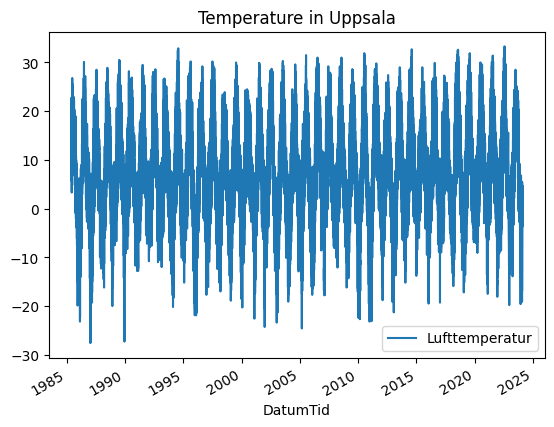

In [6]:
data.plot(x='DatumTid', y='Lufttemperatur', title='Temperature in Uppsala')

In [7]:
data = data[['DatumTid', 'Lufttemperatur']]

data.describe()

,DatumTid,Lufttemperatur
count,319233,319233.000000
mean,2005-04-29 02:00:09.179502080,6.971079
min,1985-06-01 00:00:00,-27.600000
25%,1995-08-17 22:00:00,0.700000
50%,2005-08-16 01:00:00,6.500000
75%,2014-11-19 08:00:00,13.500000
max,2024-02-01 06:00:00,33.300000
std,NaN,8.586508


In [8]:
data_1993 = data[(data['DatumTid'] >= '1993-01-01') & (data['DatumTid'] <= '1993-12-31')]

data_1993['temp_rollingavg'] = data_1993['Lufttemperatur'].rolling(window=24).mean()
data_1993.tail(10)

/var/folders/pg/6tvtzc815214nstb4nc45dcw0000gn/T/ipykernel_75917/2677474200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1993['temp_rollingavg'] = data_1993['Lufttemperatur'].rolling(window=24).mean()


,DatumTid,Lufttemperatur,temp_rollingavg
65912,1993-12-30 15:00:00,0.7,0.904167
65913,1993-12-30 16:00:00,0.6,0.945833
65914,1993-12-30 17:00:00,0.6,0.962500
65915,1993-12-30 18:00:00,0.5,0.958333
65916,1993-12-30 19:00:00,0.5,0.954167
65917,1993-12-30 20:00:00,0.5,0.945833
65918,1993-12-30 21:00:00,0.5,0.920833
65919,1993-12-30 22:00:00,0.4,0.887500
65920,1993-12-30 23:00:00,0.4,0.850000
65921,1993-12-31 00:00:00,0.3,0.829167


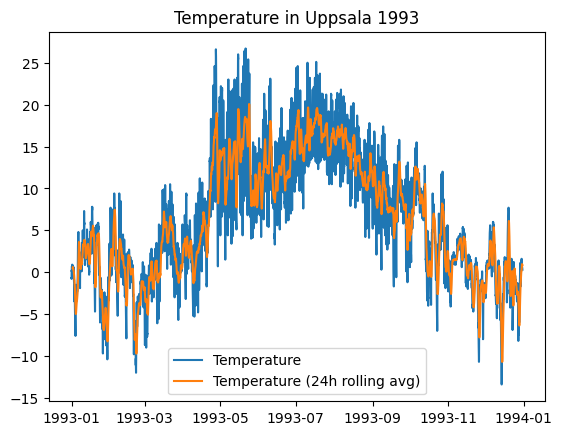

In [9]:
fig, ax = plt.subplots()

ax.plot(data_1993['DatumTid'], data_1993['Lufttemperatur'], label='Temperature')
ax.plot(data_1993['DatumTid'], data_1993['temp_rollingavg'], label='Temperature (24h rolling avg)')
ax.set_title('Temperature in Uppsala 1993')
ax.legend()

plt.show()

# data_1993.plot(x='DatumTid', y='Lufttemperatur', title='Temperature in Uppsala 1993')
# data_1993.plot(x='DatumTid', y='temp_rollingavg', title='Temperature in Uppsala 1993')

/var/folders/pg/6tvtzc815214nstb4nc45dcw0000gn/T/ipykernel_75917/3331710282.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_1993.resample('M', on='DatumTid').mean().plot(y='Lufttemperatur', title='Temperature in Uppsala')


<Axes: title={'center': 'Temperature in Uppsala'}, xlabel='DatumTid'>

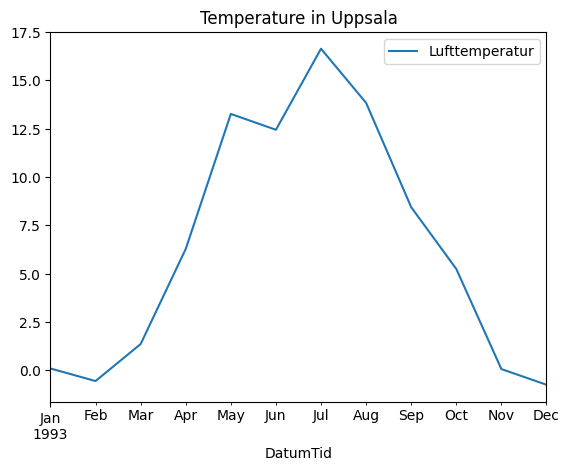

In [10]:
data_1993.resample('M', on='DatumTid').mean().plot(y='Lufttemperatur', title='Temperature in Uppsala')

<Axes: title={'center': 'Temperature in Uppsala'}, xlabel='DatumTid'>

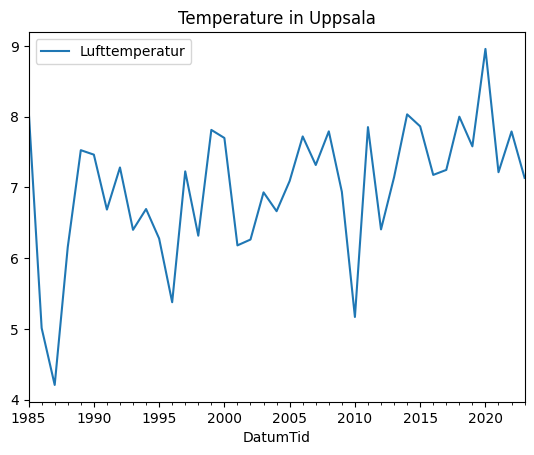

In [12]:
data[data['DatumTid'] < '2024'].resample('YE', on='DatumTid').mean().plot(y='Lufttemperatur', title='Temperature in Uppsala')